Ques 1 : Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuation using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK's
word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribution (excluding stopwords).

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
# nltk.download('punkt_tab')
# nltk.download('stopwords')

text = "Artificial Intelligence is transforming industries worldwide. From healthcare diagnostics to autonomous vehicles, AI applications are growing exponentially. Machine learning algorithms can now predict diseases with remarkable accuracy. Natural Language Processing enables computers to understand human speech. However, ethical concerns about job displacement remain. The future of AI promises both challenges and opportunities."
clean_text = re.sub(r'[^\w\s]','',text.lower())
print(clean_text)

words_split = clean_text.split()
print(words_split)
words_tokenized = word_tokenize(clean_text)
print(words_tokenized)
sentences = sent_tokenize(text)
print(sentences)

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words_tokenized if w not in stop_words]
print(filtered_words)

fdist = FreqDist(filtered_words)
print(fdist.most_common(5))

artificial intelligence is transforming industries worldwide from healthcare diagnostics to autonomous vehicles ai applications are growing exponentially machine learning algorithms can now predict diseases with remarkable accuracy natural language processing enables computers to understand human speech however ethical concerns about job displacement remain the future of ai promises both challenges and opportunities
['artificial', 'intelligence', 'is', 'transforming', 'industries', 'worldwide', 'from', 'healthcare', 'diagnostics', 'to', 'autonomous', 'vehicles', 'ai', 'applications', 'are', 'growing', 'exponentially', 'machine', 'learning', 'algorithms', 'can', 'now', 'predict', 'diseases', 'with', 'remarkable', 'accuracy', 'natural', 'language', 'processing', 'enables', 'computers', 'to', 'understand', 'human', 'speech', 'however', 'ethical', 'concerns', 'about', 'job', 'displacement', 'remain', 'the', 'future', 'of', 'ai', 'promises', 'both', 'challenges', 'and', 'opportunities']
['a

Ques 2 : Using the same paragraph from Q1:
1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK's stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmatization with WordNetLemmatizer
5. Compare the stemmed and lemmatized outputs and explain when you'd prefer one over
the other.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

text = "Artificial Intelligence is transforming industries worldwide. From healthcare diagnostics to autonomous vehicles, AI applications are growing exponentially. Machine learning algorithms can now predict diseases with remarkable accuracy. Natural Language Processing enables computers to understand human speech. However, ethical concerns about job displacement remain. The future of AI promises both challenges and opportunities."
clean_text = re.sub(r'[^\w\s]','',text.lower())
alpha_words = re.findall(r'\b[a-z]+\b',clean_text)
words_tokenized = word_tokenize(clean_text)
print(words_tokenized)

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words_tokenized if w not in stop_words]
print(filtered_words)

stemmer = PorterStemmer()
stemmed = [stemmer.stem(w) for w in filtered_words]
print(stemmed)

lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(w) for w in filtered_words]
print(lemmatized)

# Stemming is faster but crude (cuts endings), lemmatization is accurate but slower
# Prefer stemming for search engines, lemmatization for text analysis

['artificial', 'intelligence', 'is', 'transforming', 'industries', 'worldwide', 'from', 'healthcare', 'diagnostics', 'to', 'autonomous', 'vehicles', 'ai', 'applications', 'are', 'growing', 'exponentially', 'machine', 'learning', 'algorithms', 'can', 'now', 'predict', 'diseases', 'with', 'remarkable', 'accuracy', 'natural', 'language', 'processing', 'enables', 'computers', 'to', 'understand', 'human', 'speech', 'however', 'ethical', 'concerns', 'about', 'job', 'displacement', 'remain', 'the', 'future', 'of', 'ai', 'promises', 'both', 'challenges', 'and', 'opportunities']
['artificial', 'intelligence', 'transforming', 'industries', 'worldwide', 'healthcare', 'diagnostics', 'autonomous', 'vehicles', 'ai', 'applications', 'growing', 'exponentially', 'machine', 'learning', 'algorithms', 'predict', 'diseases', 'remarkable', 'accuracy', 'natural', 'language', 'processing', 'enables', 'computers', 'understand', 'human', 'speech', 'however', 'ethical', 'concerns', 'job', 'displacement', 'remain

Ques 3 : Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1. Use CountVectorizer to generate the Bag of Words representation.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

texts = ["AI beats human at chess",
         "New smartphone released with advanced camera",
         "Stock market reaches all-time high"]

cv = CountVectorizer()
bow = cv.fit_transform(texts)
print(bow.toarray())

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
print(tfidf_matrix.toarray())

for i,text in enumerate(texts):
    feature_index = tfidf_matrix[i,:].nonzero()[1]
    scores = zip(feature_index,[tfidf_matrix[i,x] for x in feature_index])
    top = sorted(scores,key=lambda x:x[1],reverse=True)[:3]
    print(f"Text {i+1} top keywords:", [tfidf.get_feature_names_out()[i] for i,score in top])

[[0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1]
 [0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0]]
[[0.         0.4472136  0.         0.4472136  0.4472136  0.
  0.4472136  0.         0.4472136  0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.40824829 0.         0.         0.         0.         0.40824829
  0.         0.         0.         0.         0.40824829 0.
  0.40824829 0.40824829 0.         0.         0.40824829]
 [0.         0.         0.40824829 0.         0.         0.
  0.         0.40824829 0.         0.40824829 0.         0.40824829
  0.         0.         0.40824829 0.40824829 0.        ]]
Text 1 top keywords: ['ai', 'beats', 'human']
Text 2 top keywords: ['new', 'smartphone', 'released']
Text 3 top keywords: ['stock', 'market', 'reaches']


Ques 4 : Write 2 short texts (4-6 lines each) describing two different technologies (e.g., AI vs Blockchain).
1. Preprocess and tokenize both texts.
2. Calculate:
  
  a. Jaccard Similarity using sets.

  b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
  
  c. Analyze which similarity metric gives better insights in your case.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk import jaccard_distance

text1 = "AI uses neural networks for pattern recognition..."
text2 = "Blockchain creates decentralized ledgers for transactions..."

clean_text1 = re.sub(r'[^\w\s]','',text1.lower())
words_tokenized1 = word_tokenize(clean_text1)
print(words_tokenized1)
clean_text2 = re.sub(r'[^\w\s]','',text2.lower())
words_tokenized2 = word_tokenize(clean_text2)
print(words_tokenized2)
# 2a
set1 = set(text1.split())
set2 = set(text2.split())
jaccard_sim = 1 - jaccard_distance(set1,set2)
print(jaccard_sim)
#2b
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1,text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1],tfidf_matrix[1:2])[0][0]
print(cosine_sim)
# 2c. Analysis: Cosine better for text as it considers term importance

['ai', 'uses', 'neural', 'networks', 'for', 'pattern', 'recognition']
['blockchain', 'creates', 'decentralized', 'ledgers', 'for', 'transactions']
0.08333333333333337
0.0845798608014702


Ques 5 : Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjectivity for each review.
2. Classify reviews into Positive / Negative / Neutral.
3. Create a word cloud using the wordcloud library for all positive reviews.

0.55
0.7
Positive


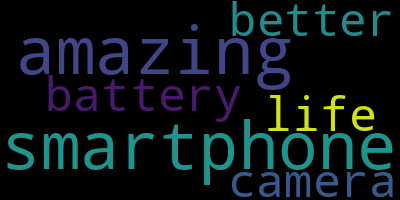

In [1]:
from textblob import TextBlob
from wordcloud import WordCloud

review = "This smartphone has amazing battery life but the camera could be better."

blob = TextBlob(review)
polarity = blob.sentiment.polarity
print(polarity)
subjectivity = blob.sentiment.subjectivity
print(subjectivity)

if polarity > 0.1:
    sentiment = "Positive"
elif polarity < -0.1:
    sentiment = "Negative"
else:
    sentiment = "Neutral"
print(sentiment)

wordcloud = WordCloud().generate(review)
wordcloud.to_image()

Ques 6 : Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2-3 new lines of text starting from any seed word you
provide.

In [23]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense
import numpy as np

tokenizer = Tokenizer()
text = "Artificial Intelligence is transforming industries worldwide. From healthcare diagnostics to autonomous vehicles, AI applications are growing exponentially. Machine learning algorithms can now predict diseases with remarkable accuracy. Natural Language Processing enables computers to understand human speech. However, ethical concerns about job displacement remain. The future of AI promises both challenges and opportunities."
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index)+1
print(total_words)

input_sequences = []
for line in text.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre')

X = input_sequences[:,:-1]
y = input_sequences[:,-1]
y = np.array([np.eye(total_words)[i] for i in y])

model = Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len-1))
model.add(LSTM(100))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X,y,epochs=50,verbose=1)
def generate_text(seed_text,next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
        predicted = np.argmax(model.predict(token_list),axis=-1)
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text

print(generate_text("Human",5))
print(generate_text("Space",6))
print(generate_text("Future",4))

51
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.0000e+00 - loss: 3.9332
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0892 - loss: 3.9262
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1141 - loss: 3.9198
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1037 - loss: 3.9143
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1390 - loss: 3.9066
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1037 - loss: 3.8989 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1037 - loss: 3.8910 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0933 - loss: 3.8831 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1141 - loss: 3.8673 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0996 - loss: 3.8525
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0892 - loss: 3.8252
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0747 - los